In [1]:
from metabolinks import align, read_aligned_spectra, read_spectra_from_xcel
from metabolinks.similarity import mz_similarity
#This and another later warning appears since I messed up my package versions in anaconda. It doesn't affect anything here.

C:\Users\francisco\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Similarity analysis with 2nd data used being the following peak alignment: 
#### 1st alignment: min_sample = 1, 2nd alignment: min_sample = 13 - NAME: 1-13

All further changes to code will first be implemented on the original similarity_analysis. This is an altered version of said original.

Coloured labels in dendrograms that have the 39 samples.

## Similarity analysis

#### Read aligned data, using peaks that appear in at least 2 samples

In [2]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min2_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min2_1ppm_negative.csv', labels=True, sep=',')
#print('------ positive mode aligned --------------')
#print(aligned_all_pos.info())
#print('------ negative mode aligned --------------')
#print(aligned_all_neg.info())

#### Compute m/z similarities

In [3]:
sim_pos = mz_similarity(aligned_all_pos)
sim_neg = mz_similarity(aligned_all_neg)

In [4]:
print(sim_pos)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10    23  ...    34  \
14       330  277  253  202  200  195  207  214  207   152  ...   175   
15       277  379  302  233  232  224  227  231  223   179  ...   201   
16       253  302  355  222  222  218  212  212  208   164  ...   189   
29       202  233  222  667  514  526  230  233  235   308  ...   351   
30       200  232  222  514  612  471  236  236  235   284  ...   326   
31       195  224  218  526  471  624  232  237  239   294  ...   338   
8        207  227  212  230  236  232  489  399  369   182  ...   205   
9        214  231  212  233  236  237  399  501  381   184  ...   218   
10       207  223  208  235  235  239  369  381  471   181  ...   221   
23       152  179  164  308  284  294  182  184  181  1487  ...   431   
24       151  176  162  308  286  297  187  190  188  1246  ...   443   
25       146  174  159  296  269  286  177  179  180  1095  ...   429   
38      

In [5]:
print(sim_neg)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10   23  ...   34  10713-1  \
14       442  286  345  186  183  170  168  179  179   34  ...  151        6   
15       286  319  222  121  118  108  144  157  155   25  ...  146        4   
16       345  222  378  174  171  159  168  181  177   34  ...  148        4   
29       186  121  174  674  637  588  143  151  150   88  ...  202       16   
30       183  118  171  637  677  591  142  150  149   88  ...  214       22   
31       170  108  159  588  591  628  128  135  135   87  ...  184       22   
8        168  144  168  143  142  128  370  331  339  118  ...  131        4   
9        179  157  181  151  150  135  331  402  371  111  ...  138        4   
10       179  155  177  150  149  135  339  371  410  120  ...  138        4   
23        34   25   34   88   88   87  118  111  120  350  ...   23       10   
24        46   33   45   95   95   94  127  121  129  314  ...   30       10 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import pandas as pd

In [7]:
dfpos = pd.DataFrame(sim_pos.sample_similarity_jaccard,
                     columns=sim_pos.sample_names,
                     index=sim_pos.sample_names)

dfneg = pd.DataFrame(sim_neg.sample_similarity_jaccard,
                     columns=sim_neg.sample_names,
                     index=sim_neg.sample_names)

Sample similarity, positive mode


C:\Users\francisco\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


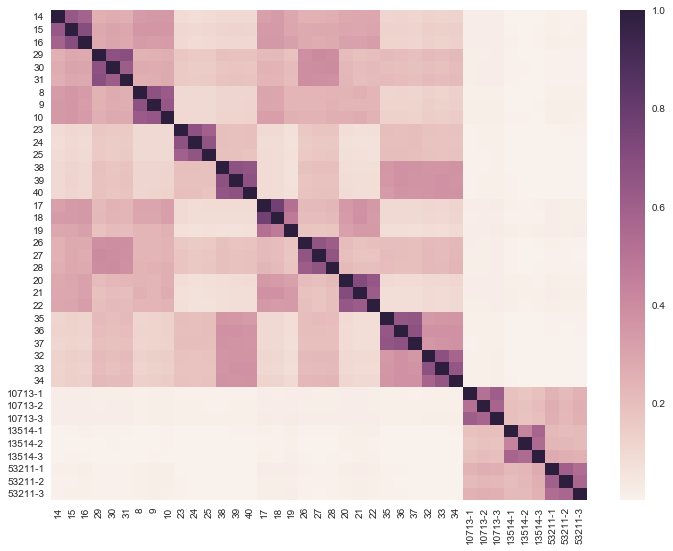

In [8]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, positive mode')
hm = sns.heatmap(dfpos, annot=False, ax=ax)

Sample similarity, negative mode


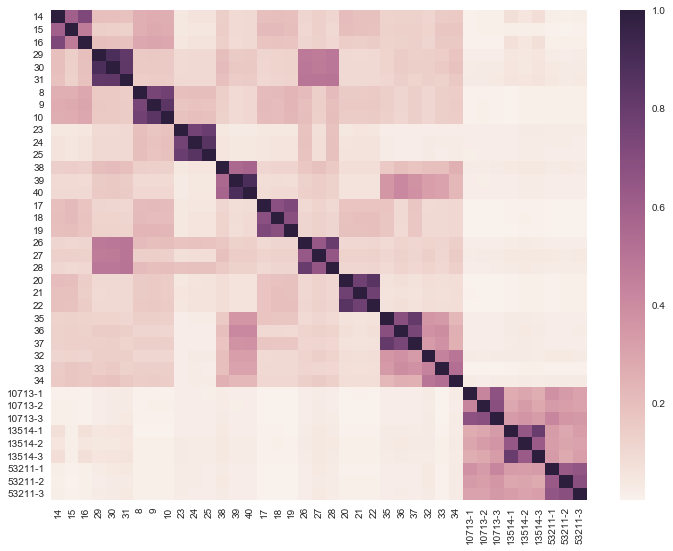

In [9]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, negative mode')
hm = sns.heatmap(dfneg, annot=False, ax=ax)

In [10]:
dfpos = pd.DataFrame(sim_pos.label_similarity_jaccard,
                     columns=sim_pos.unique_labels,
                     index=sim_pos.unique_labels)

dfneg = pd.DataFrame(sim_neg.label_similarity_jaccard,
                     columns=sim_neg.unique_labels,
                     index=sim_neg.unique_labels)

Label similarity, positive mode


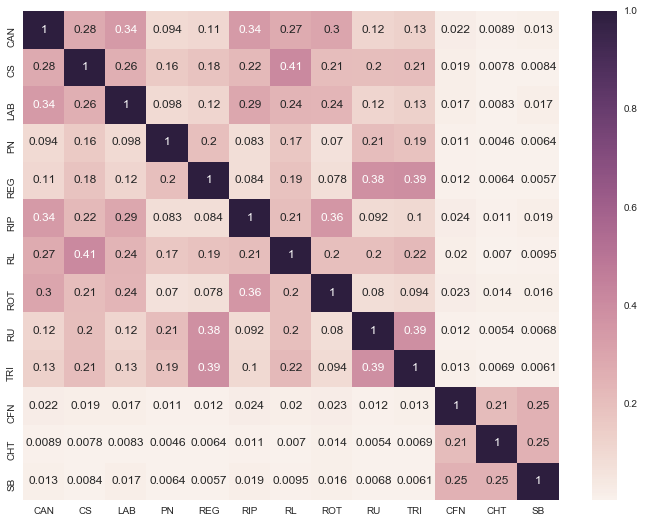

In [11]:
f, ax = plt.subplots(figsize=(12, 9))

print('Label similarity, positive mode')
hm = sns.heatmap(dfpos, annot=True, ax=ax)

Label similarity, negative mode


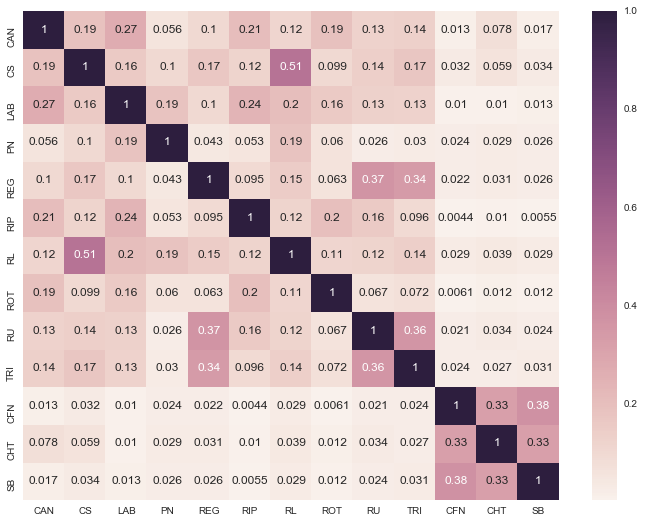

In [12]:
f, ax = plt.subplots(figsize=(12, 9))

print('Label similarity, negative mode')
hm = sns.heatmap(dfneg, annot=True, ax=ax)

#### Doing... Experiments with scipy functions...

In [13]:
import scipy.spatial.distance as dist
import scipy.cluster.hierarchy as hier

In [14]:
def df_to_bool(df):
    df = df.copy()
    df[df.notnull()] = 1
    df[df.isnull()] = 0
    return df
aligned_01 = df_to_bool(aligned_all_neg.data)
# confirm it is 0's and 1's
#aligned_01

In [15]:
jdist = dist.pdist(aligned_01.T, metric='jaccard')
print(dist.squareform(jdist))
print('------------------------------------')
sim = mz_similarity(aligned_all_neg)
jsim = sim.sample_similarity_jaccard
jdist = 1 - jsim
print(jdist)

[[ 0.          0.39789474  0.27368421 ...,  0.98458904  0.98819562
   0.98148148]
 [ 0.39789474  0.          0.53263158 ...,  0.98924731  0.99367089
   0.98951782]
 [ 0.27368421  0.53263158  0.         ...,  0.98852772  0.98867925
   0.98499062]
 ..., 
 [ 0.98458904  0.98924731  0.98852772 ...,  0.          0.37368421
   0.34736842]
 [ 0.98819562  0.99367089  0.98867925 ...,  0.37368421  0.          0.31052632]
 [ 0.98148148  0.98951782  0.98499062 ...,  0.34736842  0.31052632  0.        ]]
------------------------------------
[[ 0.          0.39789474  0.27368421 ...,  0.98458904  0.98819562
   0.98148148]
 [ 0.39789474  0.          0.53263158 ...,  0.98924731  0.99367089
   0.98951782]
 [ 0.27368421  0.53263158  0.         ...,  0.98852772  0.98867925
   0.98499062]
 ..., 
 [ 0.98458904  0.98924731  0.98852772 ...,  0.          0.37368421
   0.34736842]
 [ 0.98819562  0.99367089  0.98867925 ...,  0.37368421  0.          0.31052632]
 [ 0.98148148  0.98951782  0.98499062 ...,  0.347368

## Wrapping up in a function...

In [16]:
def clustermap_peak_list(aligned):
    aligned_01 = aligned.data.copy()
    aligned_01[aligned_01.notnull()] = 1
    aligned_01[aligned_01.isnull()] = 0
    
    ulabels = aligned.unique_labels()
    n = len(ulabels)
    
    p = sns.color_palette() + sns.color_palette("Set1", n_colors=n-6, desat=.5)
    sample_to_labels = pd.Series(aligned.labels, index=aligned.sample_names)
    label_colors = pd.Series(p, index=ulabels)
    sample_colors = sample_to_labels.map(label_colors)
    
    g = sns.clustermap(aligned_01, metric="jaccard", figsize=(15, 20), 
                       row_cluster=False,
                       col_colors=sample_colors,
                       yticklabels=False)
    # fix bug in seaborn, error in clustermap if cbar == False
    ax=g.cax; aax=ax.clear(); aax = ax.axis('off'); 

    # draw legend
    lpatches = [mpatches.Patch(color=c, label=lbl) for (lbl, c) in label_colors.iteritems()]
    leg = plt.legend(handles=lpatches, fontsize=20)
    return g
    

Sample HC, NEGATIVE mode


C:\Users\francisco\Anaconda3\lib\site-packages\seaborn\matrix.py:795: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  colors = colors.ix[data.columns]
C:\Users\francisco\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


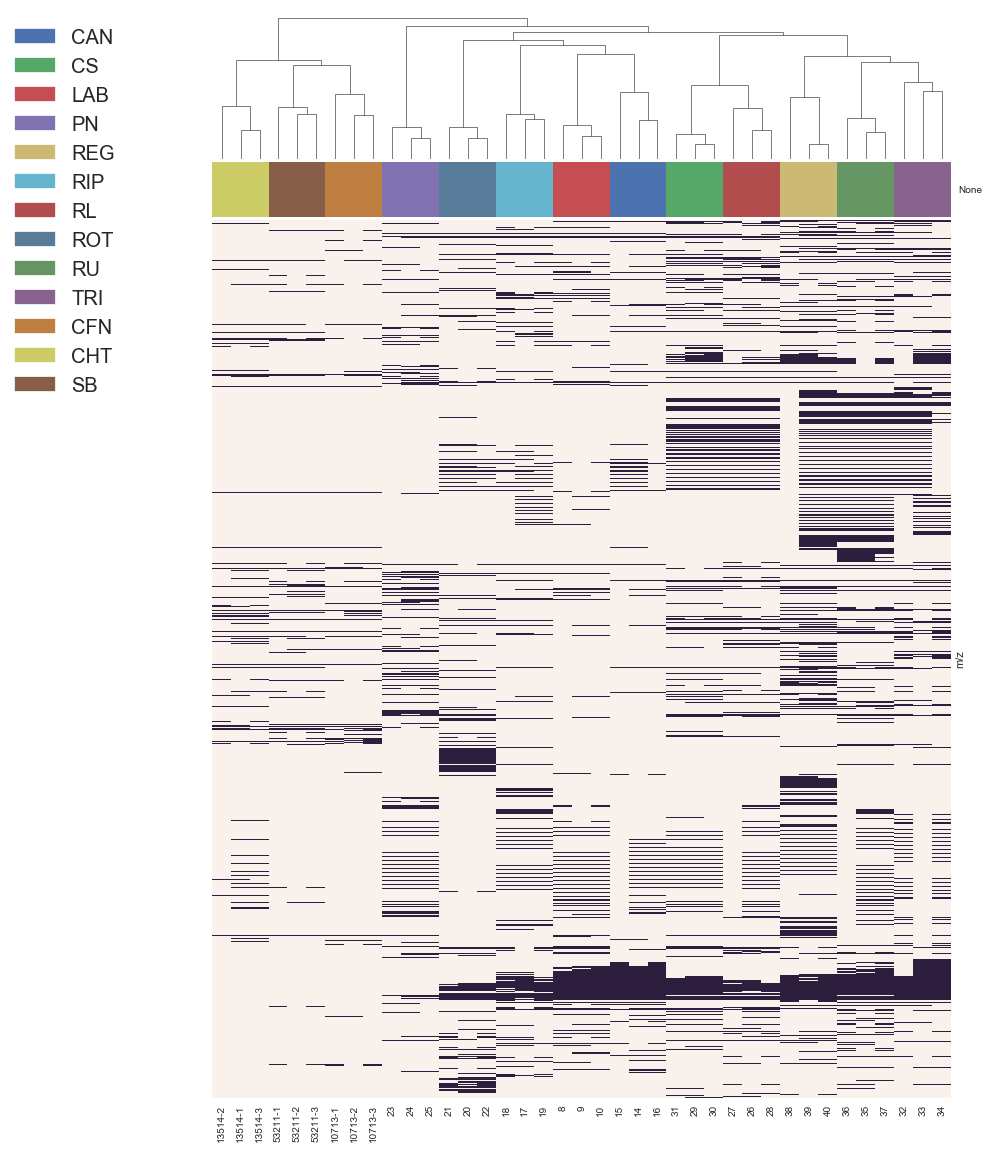

In [17]:
print('Sample HC, NEGATIVE mode')
g = clustermap_peak_list(aligned_all_neg)
g.savefig('sampleHC_negative.pdf')


Sample HC, POSITIVE mode


C:\Users\francisco\Anaconda3\lib\site-packages\seaborn\matrix.py:795: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  colors = colors.ix[data.columns]
C:\Users\francisco\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


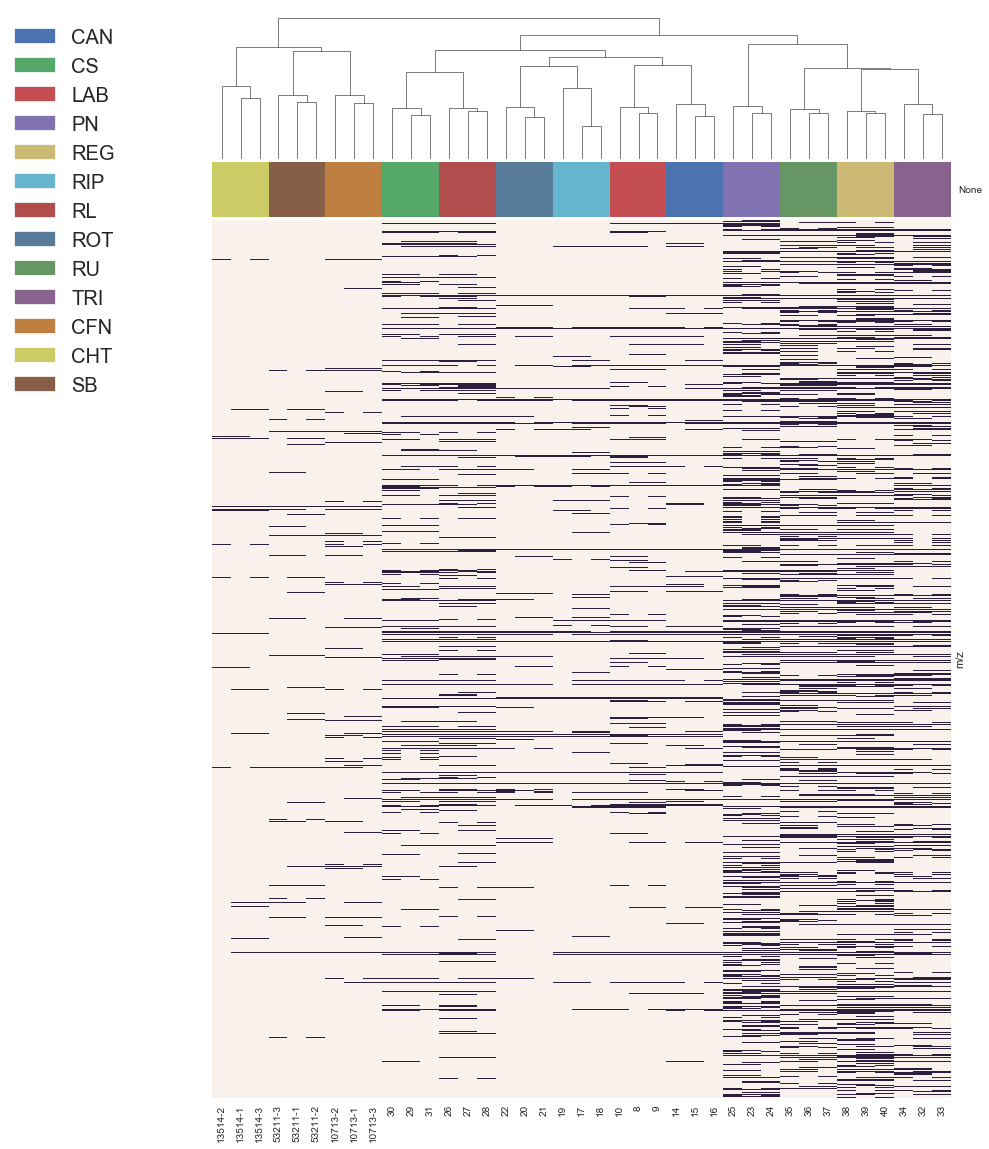

In [18]:
print('Sample HC, POSITIVE mode')
g = clustermap_peak_list(aligned_all_pos)
g.savefig('sampleHC_positive.pdf')

Cultivar dendogram, Jaccard distance, NEGATIVE MODE


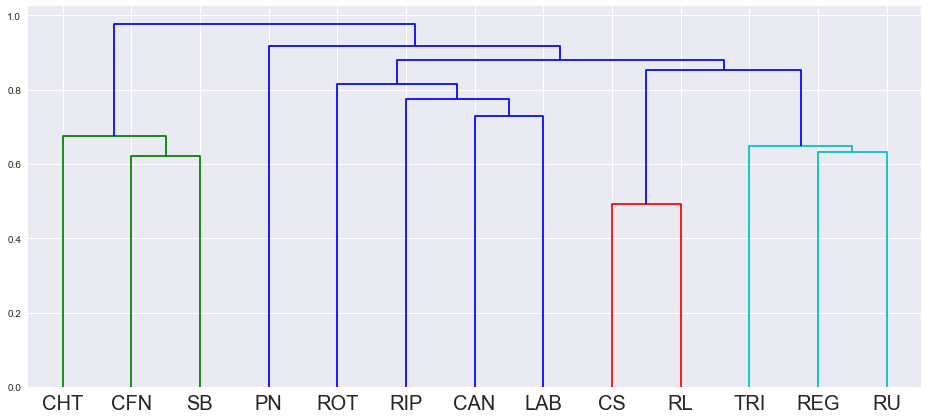

In [19]:
print('Cultivar dendogram, Jaccard distance, NEGATIVE MODE')
jdist = dist.squareform(1 - sim_neg.label_similarity_jaccard)
Z = hier.linkage(jdist, method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z, labels=sim_neg.unique_labels,
                     leaf_font_size=20,
                     above_threshold_color='b')
fig.savefig('dendo_cultivars_jaccard_negative.pdf')

In [20]:
print(hier.cophenet(Z,jdist)[0])

0.960206457887


Cultivar dendogram, Jaccard distance, POSITIVE MODE


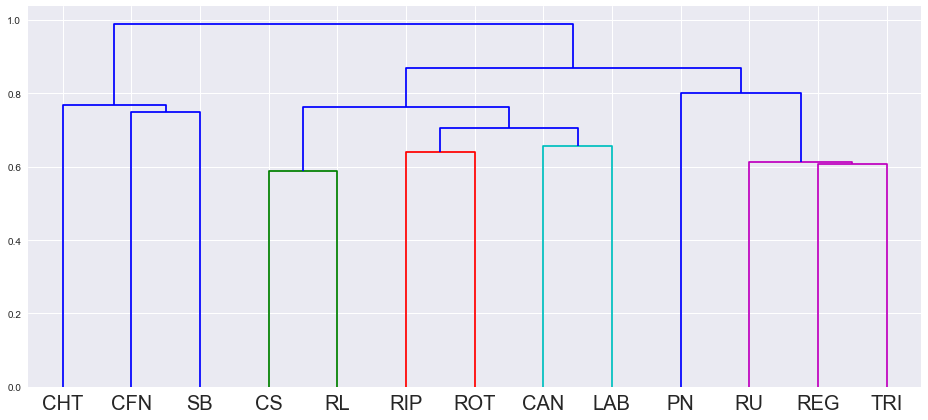

In [21]:
print('Cultivar dendogram, Jaccard distance, POSITIVE MODE')
jdist = dist.squareform(1 - sim_pos.label_similarity_jaccard)
Z = hier.linkage(jdist, method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z, labels=sim_pos.unique_labels,
                     leaf_font_size=20,
                     above_threshold_color='b')
fig.savefig('dendo_cultivars_jaccard_positive.pdf')

In [22]:
print(hier.cophenet(Z,jdist)[0])

0.968511807233


### Other Binary Similarity Analysis Methods

In [23]:
aligned_neg = df_to_bool(aligned_all_neg.data)
aligned_pos = df_to_bool(aligned_all_pos.data)

Creating the colours label for all dendrograms (negative and positive have the same labels):

In [24]:
label_colors = {}
colours = cm.get_cmap('nipy_spectral', 13)
col_lbl = colours(range(13))
for i in range(len(col_lbl)):
    label_colors[aligned_all_neg.labels[3*i]] = col_lbl[i]

Cultivar dendogram, Binary methods, NEGATIVE MODE


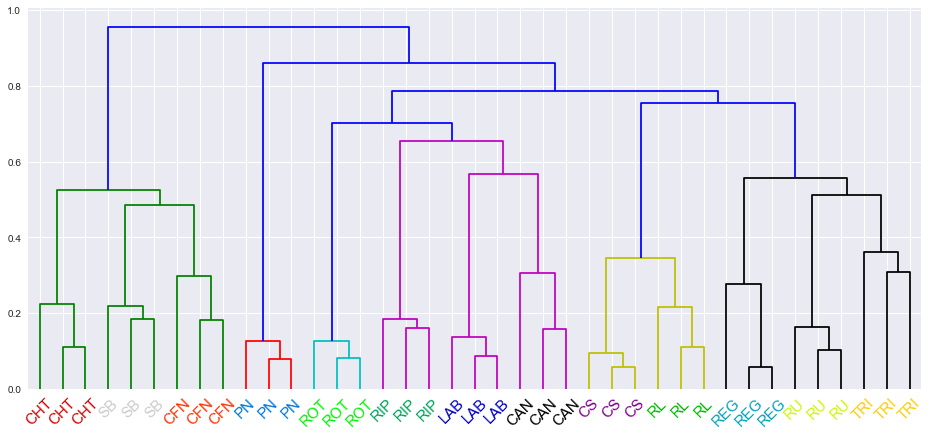

In [25]:
#Apply one of the following:
#dice, hamming, jaccard, rogerstanimoto, sokalmichener, sokalsneath, yule
#kulsinski, rusellrao

print('Cultivar dendogram, Binary methods, NEGATIVE MODE')
Zdice_neg = hier.linkage(aligned_neg.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_neg, labels=aligned_all_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

Cultivar dendogram, Binary methods, POSITIVE MODE


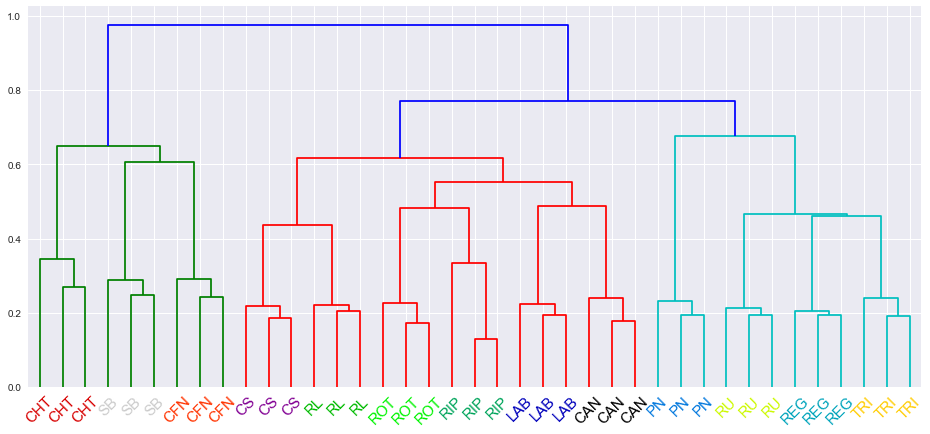

In [26]:
print('Cultivar dendogram, Binary methods, POSITIVE MODE')
Zdice_pos = hier.linkage(aligned_pos.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_pos, labels=aligned_all_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

### Non-binary Similarity Analysis

#### Missing Value Imputation and Scaling (Pareto Scaling), Euclidean Distances and Dendrogram Construction


In [27]:
import scaling as sca
import numpy as np

#### Negative Mode - Original peak alignment

3 types of processing:

Euc_neg - Missing Value Imputation and Pareto Scaling.

Euc_norm_neg - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_glog_neg - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [28]:
#Euc_neg
Imputated_neg = sca.NaN_Imputation(aligned_all_neg, 0)
Euc_neg = sca.ParetoScal(Imputated_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation and Pareto Scaling


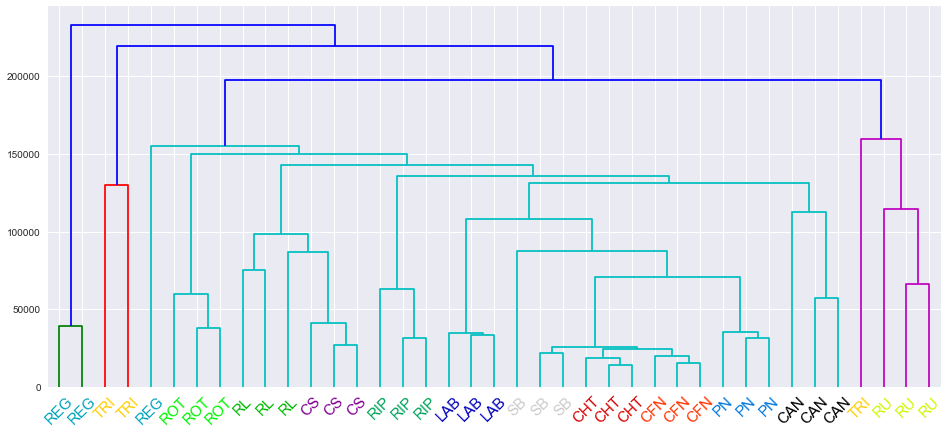

In [29]:
#Measure Euclidean distances
dist_euc_neg = dist.pdist(Euc_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation and Pareto Scaling')
Z_euc_neg = hier.linkage(dist_euc_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_neg, labels=Euc_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [30]:
#Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
print(hier.cophenet(Z_euc_neg,dist_euc_neg)[0]) #method average seems to lead to higher coefficients

0.939582707821


In [31]:
#Euc_norm_neg
#Theoretical mass for negative mode Leucine Enkephalin - 554.2615.
RefEst_Neg = sca.search_for_ref_feat(aligned_all_neg, 554.2615) #see if the function gives the reference feature
print(RefEst_Neg) #It did!

(554.26202000000001, 0.00052000000005136826)


In [32]:
Norm_neg = sca.Norm_Feat(Imputated_neg, 554.26202)
Euc_norm_neg = sca.ParetoScal(Norm_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized and Pareto Scaling


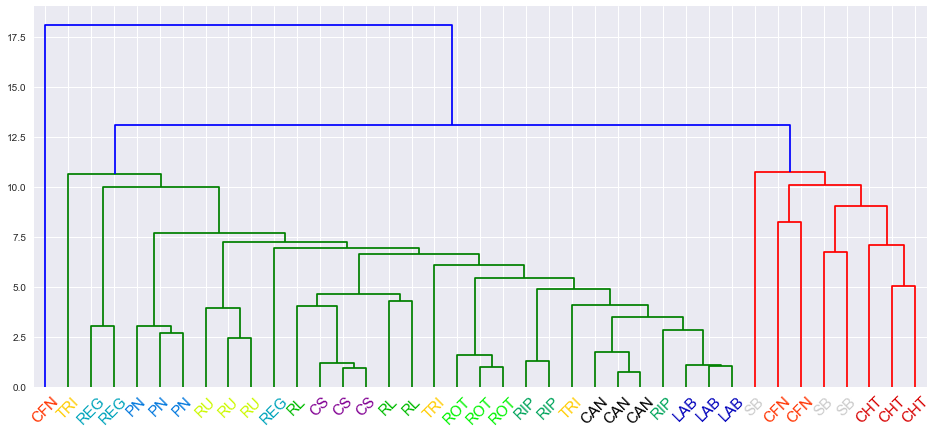

In [33]:
#Measure Euclidean distances
dist_euc_norm_neg = dist.pdist(Euc_norm_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_norm_neg = hier.linkage(dist_euc_norm_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_norm_neg, labels=Euc_norm_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [34]:
print(hier.cophenet(Z_euc_norm_neg,dist_euc_norm_neg)[0]) 

0.88662834485


In [35]:
#Euc_glog_neg
glog_neg = sca.glog(Norm_neg, 0)
Euc_glog_neg = sca.ParetoScal(glog_neg)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling


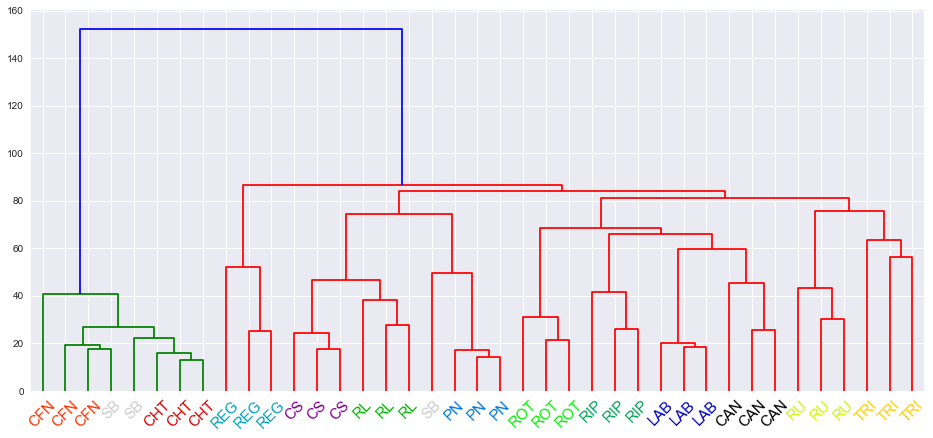

In [36]:
#Measure Euclidean distances
dist_euc_glog_neg = dist.pdist(Euc_glog_neg.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_glog_neg = hier.linkage(dist_euc_glog_neg, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_glog_neg, labels=Euc_glog_neg.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [37]:
print(hier.cophenet(Z_euc_glog_neg,dist_euc_glog_neg)[0]) 

0.907201350578


#### Positive Mode - Original peak alignment

3 types of processing:

Euc_pos - Missing Value Imputation and Pareto Scaling.

Euc_norm_pos - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_glog_pos - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [38]:
#Euc_pos
Imputated_pos = sca.NaN_Imputation(aligned_all_pos, 0)
Euc_pos = sca.ParetoScal(Imputated_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation and Pareto Scaling


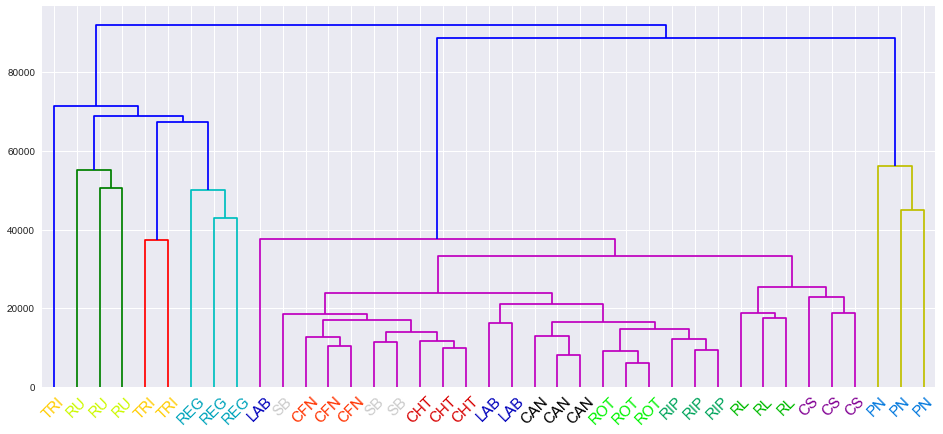

In [39]:
#Measure Euclidean distances
dist_euc_pos = dist.pdist(Euc_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation and Pareto Scaling')
Z_euc_pos = hier.linkage(dist_euc_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_pos, labels=Euc_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [40]:
print(hier.cophenet(Z_euc_pos,dist_euc_pos)[0])

0.980127182615


In [41]:
#Euc_norm_pos
#Theoretical mass for positive mode Leucine Enkephalin - 556.2771.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_pos, 556.2771)
print(RefEst_Pos)

(556.27657128205135, 0.0005287179486686)


In [42]:
Norm_pos = sca.Norm_Feat(Imputated_pos, 556.2765712820513)
Euc_norm_pos = sca.ParetoScal(Norm_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized and Pareto Scaling


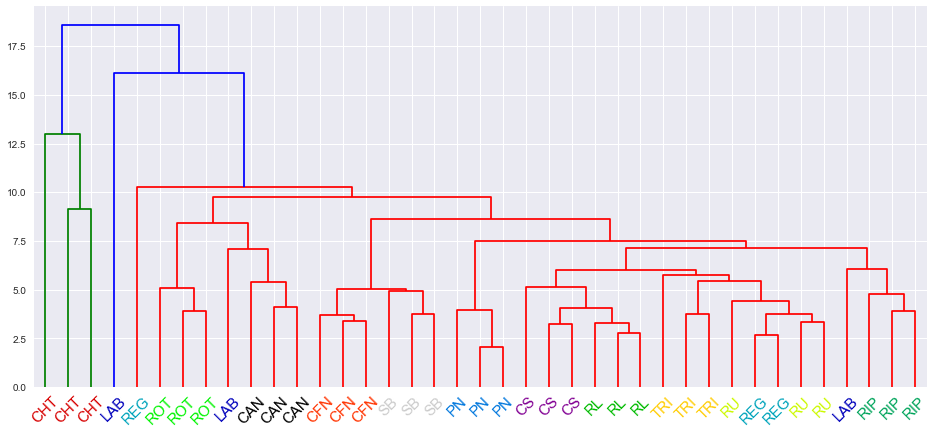

In [43]:
#Measure Euclidean distances
dist_euc_norm_pos = dist.pdist(Euc_norm_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_norm_pos = hier.linkage(dist_euc_norm_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_norm_pos, labels=Euc_norm_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [44]:
print(hier.cophenet(Z_euc_norm_pos,dist_euc_norm_pos)[0])

0.88345537695


In [45]:
#Euc_glog_pos
glog_pos = sca.glog(Norm_pos, 0)
Euc_glog_pos = sca.ParetoScal(glog_pos)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling


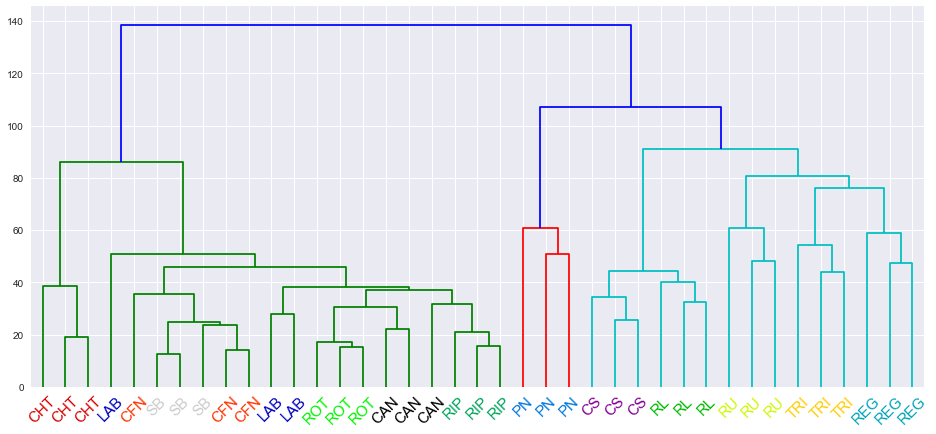

In [46]:
#Measure Euclidean distances
dist_euc_glog_pos = dist.pdist(Euc_glog_pos.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_glog_pos = hier.linkage(dist_euc_glog_pos, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_glog_pos, labels=Euc_glog_pos.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [47]:
print(hier.cophenet(Z_euc_glog_pos,dist_euc_glog_pos)[0])

0.797572414681


## 2nd Peak Alignment - 1-13

#### Negative Mode - Peak alignment (only requires a feature to be present in at least 13 of the total 39 samples)

Same procedure as before:

3 types of processing:

Euc_neg2 (in script, 1_13 in figures) - Missing Value Imputation and Pareto Scaling.

Euc_norm_neg2 (in script, 1_13 in figures) - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_glog_neg2 (in script, 1_13 in figures) - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling.

In [48]:
aligned_all_pos2 = read_aligned_spectra('aligned_1ppm_min1-13_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg2 = read_aligned_spectra('aligned_1ppm_min1-13_1ppm_negative.csv', labels=True, sep=',')

In [49]:
#Euc_neg2
Imputated_neg2 = sca.NaN_Imputation(aligned_all_neg2, 0)
Euc_neg2 = sca.ParetoScal(Imputated_neg2)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 1-13, NaN Imputation and Pareto Scaling


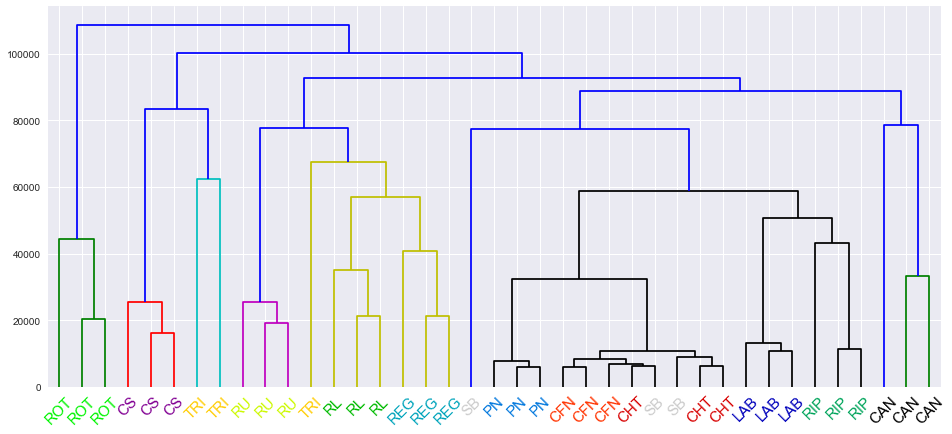

In [50]:
#Measure Euclidean distances
dist_euc_neg2 = dist.pdist(Euc_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 1-13, NaN Imputation and Pareto Scaling')
Z_euc_neg2 = hier.linkage(dist_euc_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_neg2, labels=Euc_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [51]:
print(hier.cophenet(Z_euc_neg2,dist_euc_neg2)[0]) 

0.857581251352


In [52]:
#Euc_norm_neg2
#Theoretical mass for negative mode Leucine Enkephalin - 554.2615.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_neg2, 554.2615)
print(RefEst_Pos) #Same result as previous alignment.
Norm_neg2 = sca.Norm_Feat(Imputated_neg2, 554.26202)
Euc_norm_neg2 = sca.ParetoScal(Norm_neg2)

(554.26202000000001, 0.00052000000005136826)


Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 1-13, NaN Imputation, Normalized and Pareto Scaling


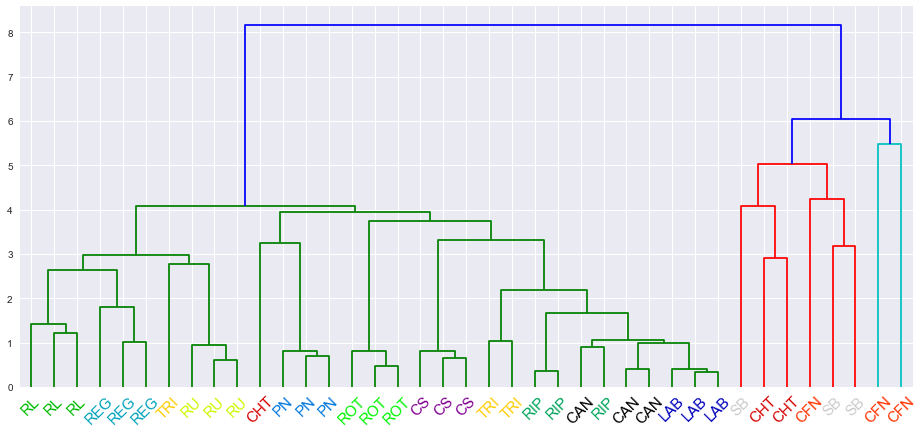

In [53]:
#Measure Euclidean distances
dist_euc_norm_neg2 = dist.pdist(Euc_norm_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 1-13, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_norm_neg2 = hier.linkage(dist_euc_norm_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_norm_neg2, labels=Euc_norm_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [54]:
print(hier.cophenet(Z_euc_norm_neg2,dist_euc_norm_neg2)[0])

0.934188759133


In [55]:
#Euc_glog_neg2
glog_neg2 = sca.glog(Norm_neg2, 0)
Euc_glog_neg2 = sca.ParetoScal(glog_neg2)

Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 1-13, NaN Imputation, Normalized, Transformed and Pareto Scaling


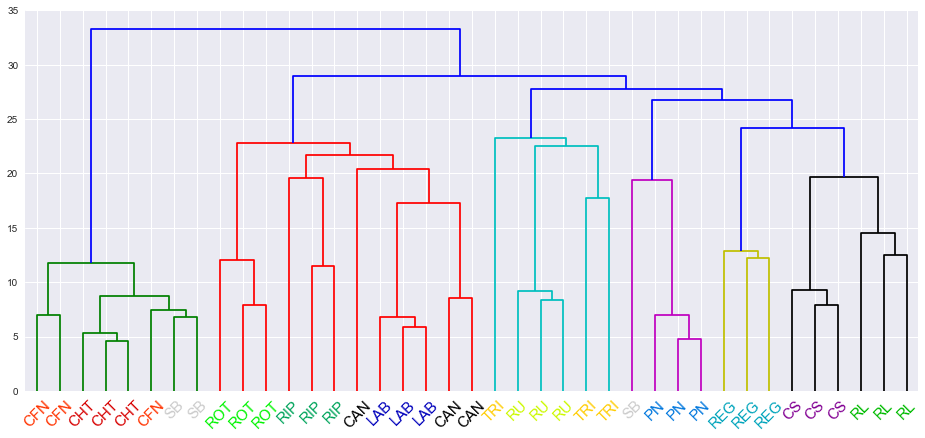

In [56]:
#Measure Euclidean distances
dist_euc_glog_neg2 = dist.pdist(Euc_glog_neg2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, NEGATIVE MODE, Peak Alignment: 1-13, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_glog_neg2 = hier.linkage(dist_euc_glog_neg2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_glog_neg2, labels=Euc_glog_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [57]:
print(hier.cophenet(Z_euc_glog_neg2,dist_euc_glog_neg2)[0]) #method average seems to lead to higher coefficients

0.871088705336


#### Positive Mode - Peak alignment (only requires a feature to be present in at least 13 of the total 39 samples)

Same procedure as before:

3 types of processing:

Euc_pos2 (in script, 1_13 in figures) - Missing Value Imputation and Pareto Scaling.

Euc_norm_pos2 (in script, 1_13 in figures) - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

Euc_glog_pos2 (in script, 1_13 in figures) - Missing Value Imputation, Normalization by reference feature, glog transformation and Pareto Scaling

In [58]:
#Euc_pos2
Imputated_pos2 = sca.NaN_Imputation(aligned_all_pos2, 0)
Euc_pos2 = sca.ParetoScal(Imputated_pos2)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 1-13, NaN Imputation and Pareto Scaling


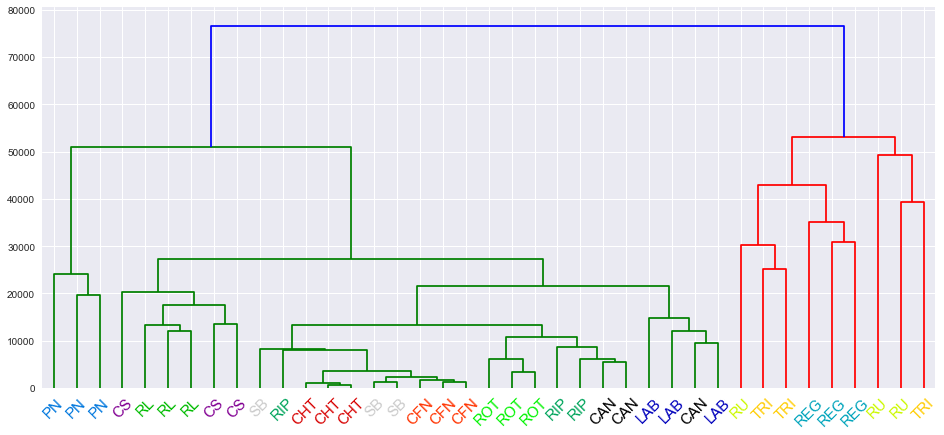

In [59]:
#Measure Euclidean distances
dist_euc_pos2 = dist.pdist(Euc_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 1-13, NaN Imputation and Pareto Scaling')
Z_euc_pos2 = hier.linkage(dist_euc_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_pos2, labels=Euc_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [60]:
print(hier.cophenet(Z_euc_pos2,dist_euc_pos2)[0])

0.97051450657


In [61]:
#Euc_norm_pos2
#Theoretical mass for positive mode Leucine Enkephalin - 556.2771.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_pos2, 556.2771)
print(RefEst_Pos) #Same result as previous alignment.
Norm_pos2 = sca.Norm_Feat(Imputated_pos2, 556.27657128205135)
Euc_norm_pos2 = sca.ParetoScal(Norm_pos2)

(556.27657128205135, 0.0005287179486686)


Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 1-13, NaN Imputation, Normalized and Pareto Scaling


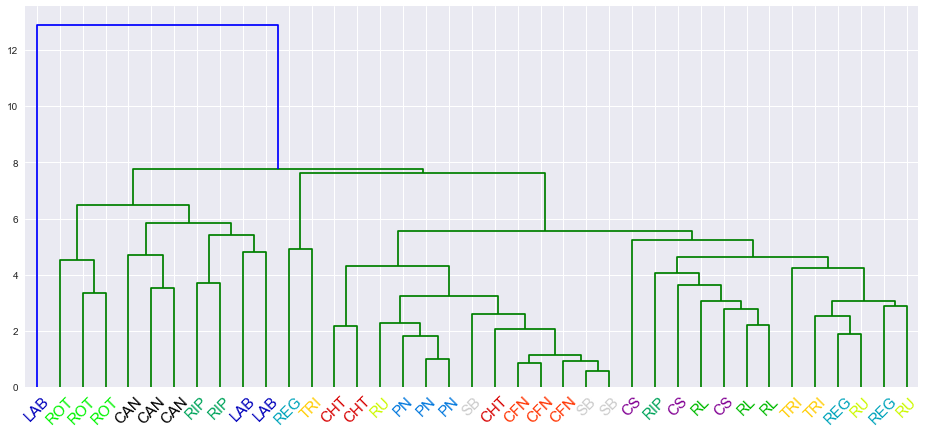

In [62]:
#Measure Euclidean distances
dist_euc_norm_pos2 = dist.pdist(Euc_norm_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 1-13, NaN Imputation, Normalized and Pareto Scaling')
Z_euc_norm_pos2 = hier.linkage(dist_euc_norm_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_norm_pos2, labels=Euc_norm_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [63]:
print(hier.cophenet(Z_euc_norm_pos2,dist_euc_norm_pos2)[0])

0.87282238861


In [64]:
#Euc_glog_pos
glog_pos2 = sca.glog(Norm_pos2, 0)
Euc_glog_pos2 = sca.ParetoScal(glog_pos2)

Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 1-13, NaN Imputation, Normalized, Transformed and Pareto Scaling


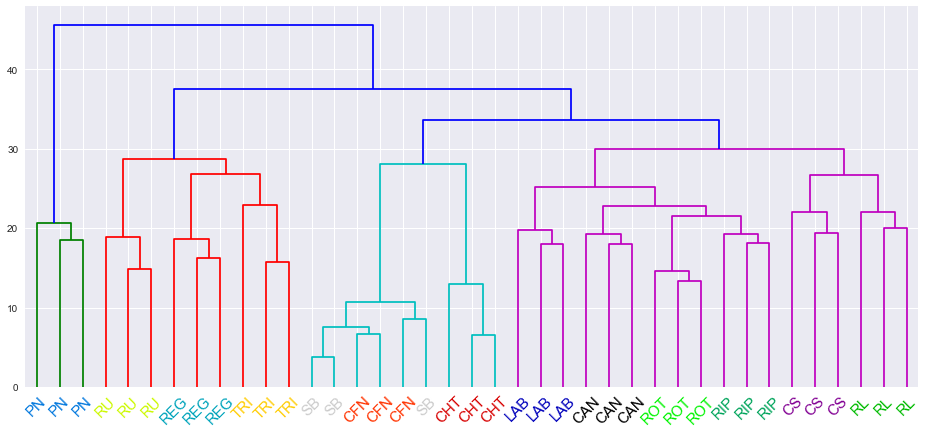

In [65]:
#Measure Euclidean distances
dist_euc_glog_pos2 = dist.pdist(Euc_glog_pos2.data.T, metric = 'euclidean')

#Constructing Dendrogram
print('Cultivar dendogram, Euclidean distance, POSITIVE MODE, Peak Alignment: 1-13, NaN Imputation, Normalized, Transformed and Pareto Scaling')
Z_euc_glog_pos2 = hier.linkage(dist_euc_glog_pos2, method='average') #ward, average, centroid, single, complete, weighted, median
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_euc_glog_pos2, labels=Euc_glog_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

In [66]:
print(hier.cophenet(Z_euc_glog_pos2,dist_euc_glog_pos2)[0])

0.905405172196


### Binary distances example for peak_alignment 2: 1-13

In [67]:
aligned_neg2 = df_to_bool(aligned_all_neg2.data)
aligned_pos2 = df_to_bool(aligned_all_pos2.data)

Cultivar dendogram, Binary methods, NEGATIVE MODE, Peak Alignment: 1-13


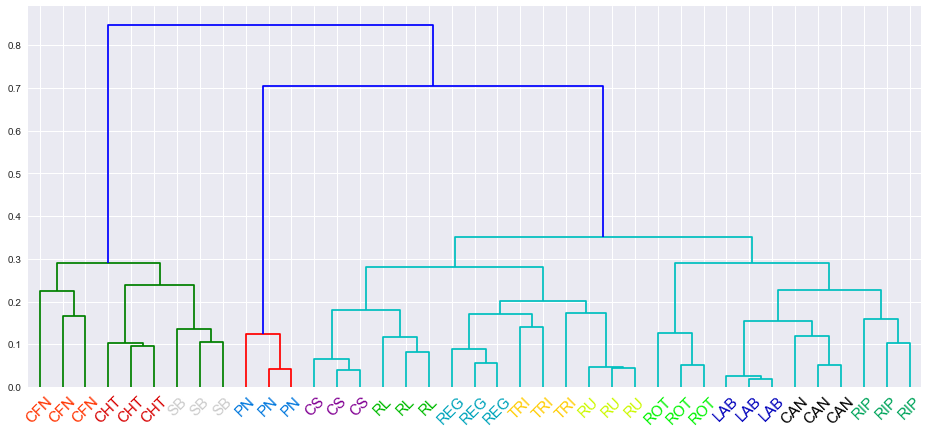

In [68]:
#Apply one of the following:
#dice, hamming, jaccard, rogerstanimoto, sokalmichener, sokalsneath, yule
#kulsinski, rusellrao

print('Cultivar dendogram, Binary methods, NEGATIVE MODE, Peak Alignment: 1-13')
Zdice_neg2 = hier.linkage(aligned_neg2.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_neg2, labels=aligned_all_neg2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

Cultivar dendogram, Binary methods, POSITIVE MODE, Peak Alignment: 1-13


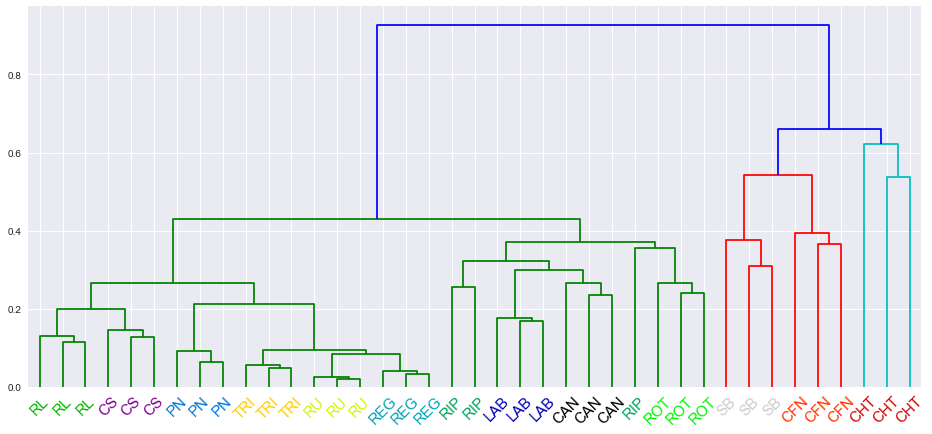

In [69]:
print('Cultivar dendogram, Binary methods, POSITIVE MODE, Peak Alignment: 1-13')
Zdice_pos2 = hier.linkage(aligned_pos2.T, metric = 'dice', method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Zdice_pos2, labels=aligned_all_pos2.labels,
                     leaf_font_size=15,
                     above_threshold_color='b')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

### Comparing Dendrograms

#### Two methods so far: Baker's Gamma Correlation and Cophenetic Correlation Coefficient

#### Examples of procedure with these methods

In [70]:
import numpy as np
import scipy.stats as stats

#### Baker's method

In [71]:

def mergerank(Z):
    """Creates a 'rank' of the iteration number two samples were linked to the same cluster.
       
       Z: 2-D array; the return of the linkage function in scypy.stats.hierarchy.
       Returns: Matrix/2-D array; Symmetrical Square Matrix (dimensions: len(Z)+1 by len(Z)+1), (i,j) position is the iteration 
    number sample i and j were linked to the same cluster (higher rank means the pair took more iterations to be linked together).
    """
    
    kmatrix = np.zeros((len(Z)+1, len(Z)+1))
    clust = {}
    for i in range(0,len(Z)+1):
        clust[i] = (float(i),)
    for r in range(0,len(Z)):
        if Z[r,0] < len(Z)+1 and Z[r,1] < len(Z)+1:
            kmatrix[int(Z[r,0]),int(Z[r,1])] = r+1
            kmatrix[int(Z[r,1]),int(Z[r,0])] = r+1
            clust[len(Z)+1+r] = Z[r,0],Z[r,1] #Dictionary with the elements in the cluster formed at iteration r. - r: (elements)
        else:
            clust[len(Z)+1+r] = clust[Z[r,0]] + clust[Z[r,1]] #Dictionary with the elements in the cluster formed at iteration r.
            for i in range(0,len(clust[Z[r,0]])):
                for j in range(0,len(clust[Z[r,1]])):
                    kmatrix[int(clust[Z[r,0]][i]),int(clust[Z[r,1]][j])] = r+1
                    kmatrix[int(clust[Z[r,1]][j]),int(clust[Z[r,0]][i])] = r+1
    return kmatrix


In [72]:
euclidean = (Z_euc_neg, Z_euc_norm_neg, Z_euc_glog_neg, Z_euc_pos, Z_euc_norm_pos, Z_euc_glog_pos,
            Z_euc_neg2, Z_euc_norm_neg2, Z_euc_glog_neg2, Z_euc_pos2, Z_euc_norm_pos2, Z_euc_glog_pos2)
dist_euclidean = (dist_euc_neg, dist_euc_norm_neg, dist_euc_glog_neg, dist_euc_pos, dist_euc_norm_pos, dist_euc_glog_pos,
                 dist_euc_neg2, dist_euc_norm_neg2, dist_euc_glog_neg2, dist_euc_pos2, dist_euc_norm_pos2, dist_euc_glog_pos2)

K_euc = []
S_euc = []
Coph_euc = []

for i in range(len(euclidean)):
    K_euc.append(mergerank(euclidean[i])) #Mergerank
    S_euc.append(K_euc[i][K_euc[i]!=0]) #Both reshape to a 1D array (needed for spearman correlation) and take out 0's 
    Coph_euc.append(hier.cophenet(euclidean[i], dist_euclidean[i])) #Matrix of Cophenetic distances

#### Examples

According to Original Paper (Stability of Two Hierarchical Grouping Techniques Case 1: Sensitivity to Data Errors)

In [73]:
print('Pair of samples      \tKendall Correlation \tp-value')
print('Euc_neg-Euc_norm_neg\t', stats.kendalltau(S_euc[0],S_euc[1])[0], '\t', stats.kendalltau(S_euc[0],S_euc[1])[1])
print('Euc_neg-Euc_glog_neg\t', stats.kendalltau(S_euc[0],S_euc[2])[0], '\t', stats.kendalltau(S_euc[0],S_euc[2])[1])

Pair of samples      	Kendall Correlation 	p-value
Euc_neg-Euc_norm_neg	 0.00891039911268 	 0.644385076123
Euc_neg-Euc_glog_neg	 0.10839742231 	 3.8352456453e-08


According to the explanation given in the R package dendextend

In [74]:
print('Pair of samples      \tSpearman Correlation \tp-value')
print('Euc_neg-Euc_norm_neg\t', stats.spearmanr(S_euc[0],S_euc[1])[0], '\t', stats.spearmanr(S_euc[0],S_euc[1])[1])
print('Euc_neg-Euc_glog_neg\t', stats.spearmanr(S_euc[0],S_euc[2])[0], '\t', stats.spearmanr(S_euc[0],S_euc[2])[1])

Pair of samples      	Spearman Correlation 	p-value
Euc_neg-Euc_norm_neg	 -0.015575487635 	 0.54908212548
Euc_neg-Euc_glog_neg	 0.129266793539 	 5.94130770267e-07


#### Cophenetic Correlation Coefficient

In [75]:
#Acho que se pode aplicar logo a função np.corrcoef visto os elementos que vêm da função cophenet estão sempre na mesma ordem 
#uns em relação aos outros.

In [76]:
print('Pair of samples      \tPearson Correlation \tp-value')
print('Euc_neg-Euc_norm_neg\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[1][1])[0], '\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[1][1])[1])
print('Euc_neg-Euc_glog_neg\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[2][1])[0], '\t', stats.pearsonr(Coph_euc[0][1],Coph_euc[2][1])[1])

Pair of samples      	Pearson Correlation 	p-value
Euc_neg-Euc_norm_neg	 0.0188618315607 	 0.608215299876
Euc_neg-Euc_glog_neg	 0.160503074641 	 1.13235103793e-05


### Comparison of dendrograms made with all binary metrics and euclidean distances 

#### Correlations between all pairs using all 3 methods

In [77]:
#9 binary methods accepted in pdist (scipy.spatial.distances.pdist)
binary = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 'yule', 'kulsinski', 'russellrao')

In [78]:
#Application of all "single" steps needed presented in the examples above with every distance metric.
#Negative mode
Z_neg = []
K_neg = []
S_neg = []
Coph_neg = []

for i in range(len(binary)):
    Z_neg.append(hier.linkage(aligned_neg.T, metric = binary[i], method='average')) #Z
    K_neg.append(mergerank(Z_neg[i])) #Mergerank
    S_neg.append(K_neg[i][K_neg[i]!=0]) #Eliminating 0's
    Coph_neg.append(hier.cophenet(Z_neg[i], dist.pdist(aligned_neg.T, metric = binary[i]))) #Cophenetic

In [79]:
#Positive Mode
Z_pos = []
K_pos = []
S_pos = []
Coph_pos = []

for i in range(len(binary)):
    Z_pos.append(hier.linkage(aligned_pos.T, metric = binary[i], method='average')) #Z
    K_pos.append(mergerank(Z_pos[i])) #Mergerank
    S_pos.append(K_pos[i][K_pos[i]!=0]) #Eliminating 0's
    Coph_pos.append(hier.cophenet(Z_pos[i], dist.pdist(aligned_pos.T, metric = binary[i]))) #Cophenetic

In [80]:
#Creation of a list with all the "rank" values (in order) for the different metrics: 
#Negative Euclideans, Positive Euclideans, Negative Binaries, Positive Binaries
S = []
S.extend(S_euc)
S.extend(S_neg)
S.extend(S_pos)
#Creation of a list with all the returns from the function cophenetic for the different metrics: 
#Negative Euclideans, Positive Euclideans, Negative Binaries, Positive Binaries
Coph = []
Coph.extend(Coph_euc)
Coph.extend(Coph_neg)
Coph.extend(Coph_pos)

Creation of all dataframes needed to store all correlation coeficients and respective p-values fot all three methods

In [81]:
#Column names and row names for the dataframes
colnames = ['euc_neg', 'euc_norm_neg', 'euc_glog_neg', 'euc_pos', 'euc_norm_pos', 'euc_glog_pos','euc_neg1_13', 
            'euc_norm_neg1_13', 'euc_glog_neg1_13', 'euc_pos1_13', 'euc_norm_pos1_13', 'euc_glog_pos1_13','dice_neg', 
            'hamming_neg', 'jaccard_neg', 'rogerstanimoto_neg', 'sokalmichener_neg', 'sokalsneath_neg','yule_neg', 
            'kulsinski_neg', 'russellrao_neg','dice_pos', 'hamming_pos', 'jaccard_pos', 'rogerstanimoto_pos', 
            'sokalmichener_pos', 'sokalsneath_pos', 'yule_pos', 'kulsinski_pos', 'russellrao_pos']

In [82]:
df_K = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #K - Kendall (Baker)
df_S = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #S - Spearman (Baker)
df_C = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #C - Cophenetic Correlation
df_K_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of K method
df_S_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of S method
df_C_p = pd.DataFrame(np.zeros((len(S),len(S))), columns = colnames, index = colnames) #p-values of C method

In [83]:
#Calculation of correlation coefficient for each method
for i in range(len(S)):
    for j in range(len(S)):
        df_K.iloc[i,j] = stats.kendalltau(S[i],S[j])[0] #Correlation coefficient
        df_S.iloc[i,j] = stats.spearmanr(S[i],S[j])[0] #Correlation coefficient
        df_C.iloc[i,j] = stats.pearsonr(Coph[i][1],Coph[j][1])[0] #Correlation coefficient
        df_K_p.iloc[i,j] = stats.kendalltau(S[i],S[j])[1] #p-value
        df_S_p.iloc[i,j] = stats.spearmanr(S[i],S[j])[1] #p-value
        df_C_p.iloc[i,j] = stats.pearsonr(Coph[i][1],Coph[j][1])[1] #p-value

### Heatmaps of the correlation coeficients for the 3 methods

Baker (Kendall) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use (2-1)
Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.


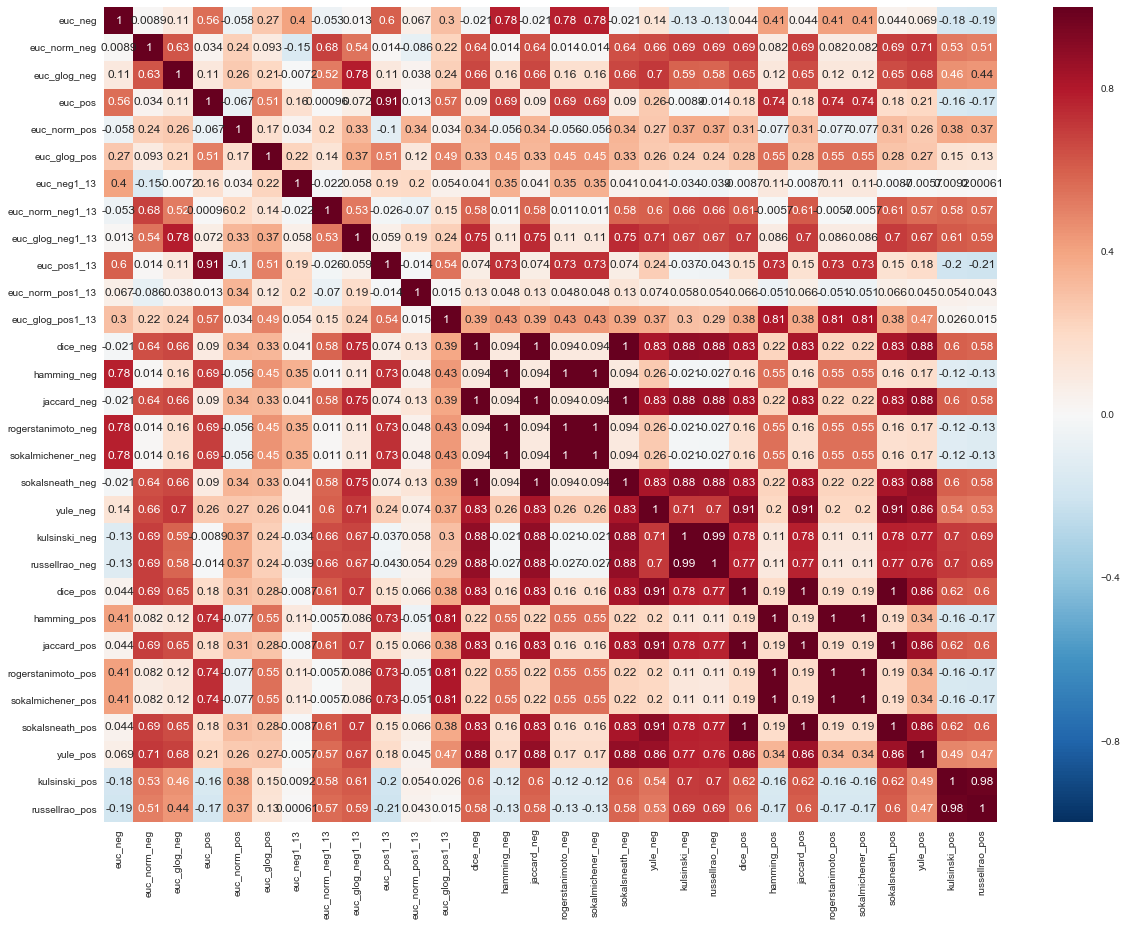

In [84]:
f, ax = plt.subplots(figsize=(20, 15))

print('Baker (Kendall) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use (2-1)')
print('Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.')
hm = sns.heatmap(df_K, annot=True, ax=ax)

In [85]:
Kendall = pd.DataFrame(np.zeros((9, 5)), index = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 
                                                 'yule', 'kulsinski', 'russellrao'), columns = ('neg', 'pos', 'neg1-13', 'pos1-13',
                                                                                                 'neg+pos'))

for j in range(5):
    for r in range(9):
        if j in [0,2]:
            Kendall.iloc[r,j] = sum(df_K.iloc[12+r,j*3:j*3+3])
        elif j in [1,3]:
            Kendall.iloc[r,j] = sum(df_K.iloc[21+r,j*3:j*3+3])
        else:
            Kendall.iloc[r,j] = sum(Kendall.iloc[r,0:4])
print(Kendall)

                     neg       pos   neg1-13   pos1-13   neg+pos
dice            1.289152  0.767859  1.373034  0.596925  4.026970
hamming         0.957240  1.216316  0.472590  1.480725  4.126870
jaccard         1.289152  0.767747  1.373034  0.596851  4.026784
rogerstanimoto  0.957240  1.216316  0.472590  1.480725  4.126870
sokalmichener   0.957240  1.216316  0.472590  1.480725  4.126870
sokalsneath     1.289152  0.767747  1.373034  0.596851  4.026784
yule            1.506444  0.742386  1.350036  0.693542  4.292408
kulsinski       1.154379  0.362957  1.292807 -0.115608  2.694536
russellrao      1.145251  0.335074  1.285520 -0.148112  2.617733


Baker (Spearman) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use (2-1)
Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.


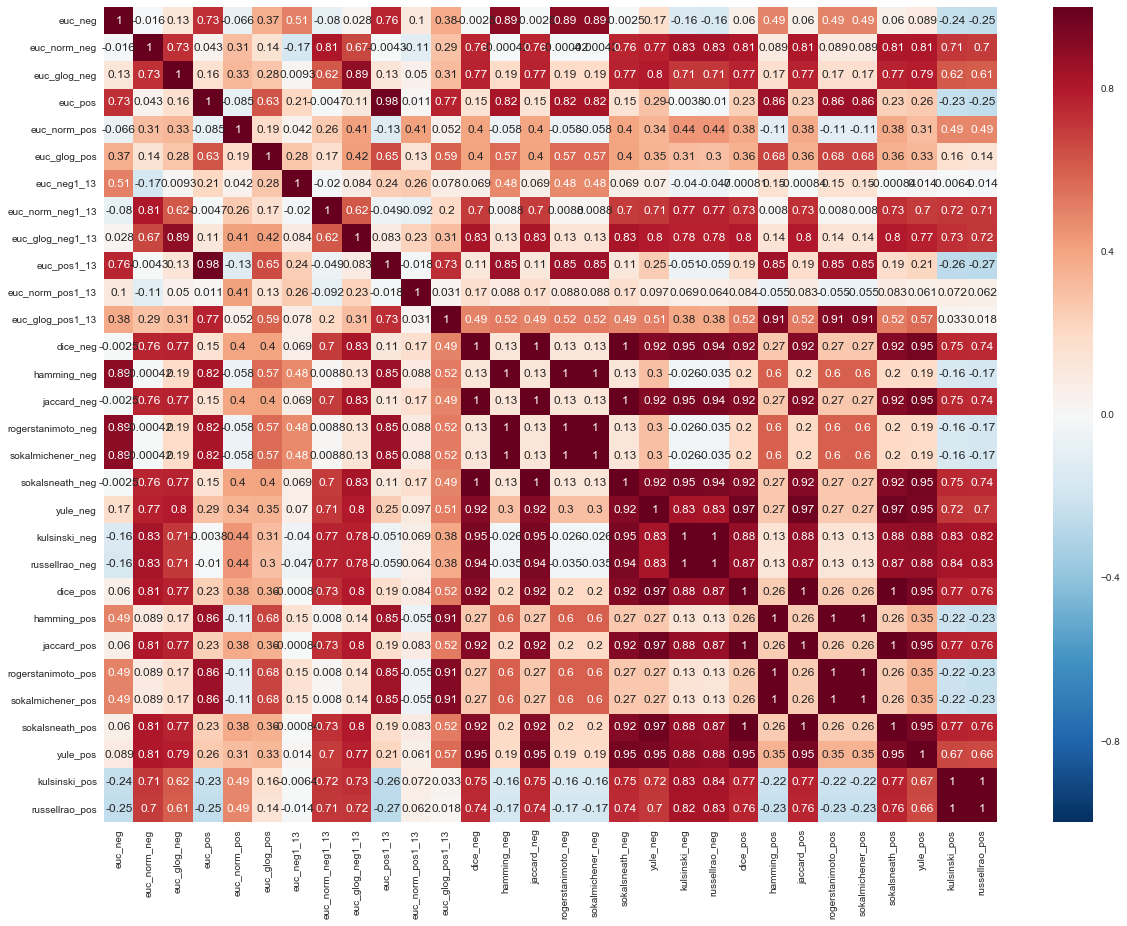

In [86]:
f, ax = plt.subplots(figsize=(20, 15))

print('Baker (Spearman) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use (2-1)')
print('Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.')
hm = sns.heatmap(df_S, annot=True, ax=ax)

Cophenetic Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use (2-1)
Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.


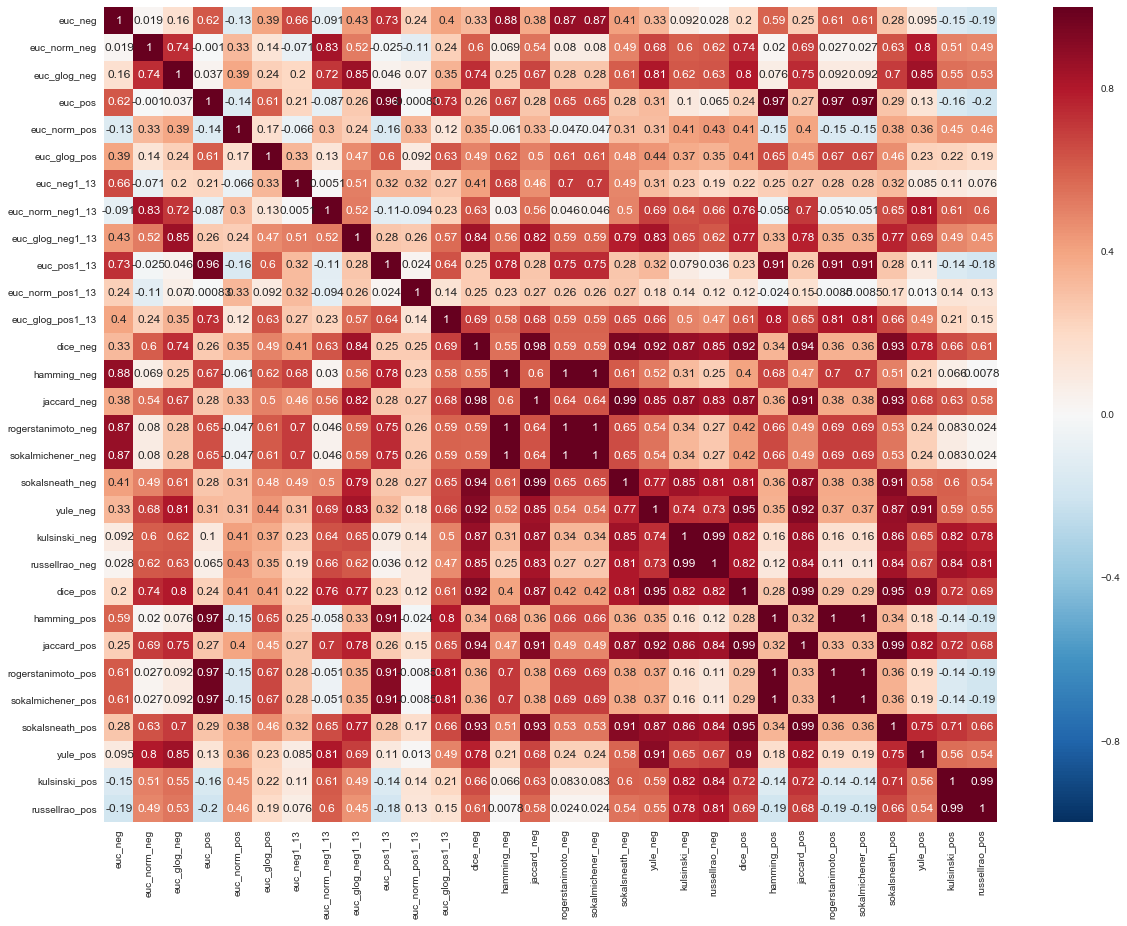

In [87]:
f, ax = plt.subplots(figsize=(20, 15))

print('Cophenetic Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use (2-1)')
print('Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.')
hm = sns.heatmap(df_C, annot=True, ax=ax)

In [88]:
Cophenetic = pd.DataFrame(np.zeros((9, 5)), index = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 
                                                 'yule', 'kulsinski', 'russellrao'), columns = ('neg', 'pos', 'neg1-13', 'pos1-13',
                                                                                                 'neg+pos'))

for j in range(5):
    for r in range(9):
        if j in [0,2]:
            Cophenetic.iloc[r,j] = sum(df_C.iloc[12+r,j*3:j*3+3])
        elif j in [1,3]:
            Cophenetic.iloc[r,j] = sum(df_C.iloc[21+r,j*3:j*3+3])
        else:
            Cophenetic.iloc[r,j] = sum(Cophenetic.iloc[r,0:4])
print(Cophenetic)

                     neg       pos   neg1-13   pos1-13   neg+pos
dice            1.670968  1.052512  1.884827  0.963007  5.571314
hamming         1.203157  1.475753  1.272191  1.688846  5.639946
jaccard         1.595127  1.118514  1.843697  1.069458  5.626796
rogerstanimoto  1.231841  1.491149  1.340402  1.708563  5.771955
sokalmichener   1.231841  1.491149  1.340402  1.708563  5.771955
sokalsneath     1.508866  1.132893  1.772218  1.111549  5.525526
yule            1.818164  0.726164  1.827351  0.611225  4.982904
kulsinski       1.318308  0.513893  1.523541  0.201720  3.557462
russellrao      1.277794  0.449975  1.473933  0.102999  3.304701


### Hierarchical clustering of the correlation coeficients of dendrograms made with different distance metrics with each other

Colours for these labels (groups: neg_peakalignment1, pos_peakalignment1, neg_peakalignment2, pos_peakalignment2, neg_binary, pos_binary

In [89]:
label_colors2 = {}
colours2 = cm.get_cmap('nipy_spectral', 6)
col_lbl2 = colours2(range(6))
for i in range(4):
    label_colors2[df_K.columns[3*i]] = col_lbl2[i]
    label_colors2[df_K.columns[3*i+1]] = col_lbl2[i]
    label_colors2[df_K.columns[3*i+2]] = col_lbl2[i]
for i in range(9):
    label_colors2[df_K.columns[12+i]] = col_lbl2[4]
    label_colors2[df_K.columns[21+i]] = col_lbl2[5]

Hierarchical clustering of the Baker (Kendall) Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use (2-1)
Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.


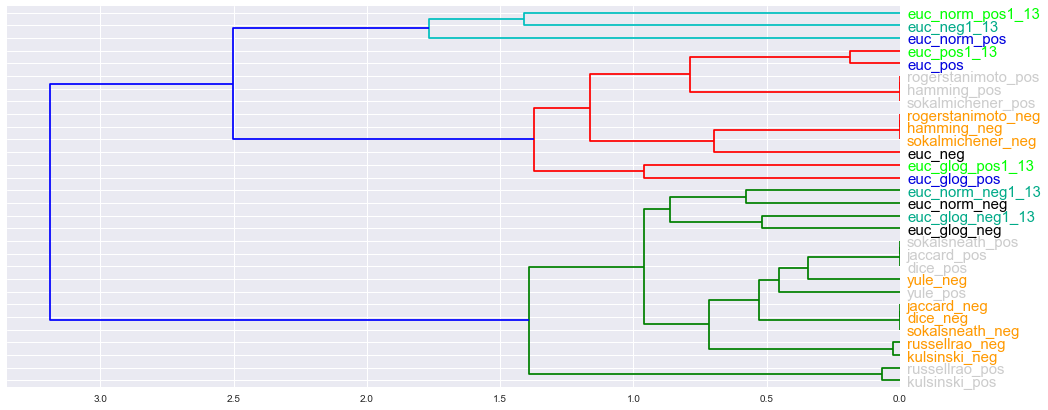

In [90]:
print('Hierarchical clustering of the Baker (Kendall) Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use (2-1)')
print('Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.')
Z_K = hier.linkage(df_K, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_K, labels=df_K.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

Hierarchical clustering of the Baker (Spearman) Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use (2-1)
Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.


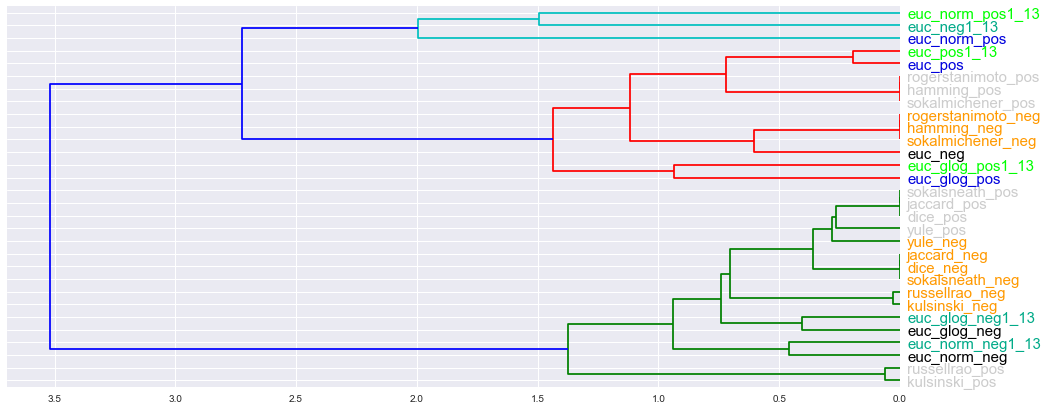

In [91]:
print('Hierarchical clustering of the Baker (Spearman) Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use (2-1)')
print('Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.')
Z_S = hier.linkage(df_S, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_S, labels=df_S.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

Hierarchical clustering of the Cophenetic Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
Euc - Original peak alignment that all binary measures use (2-1)
Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.


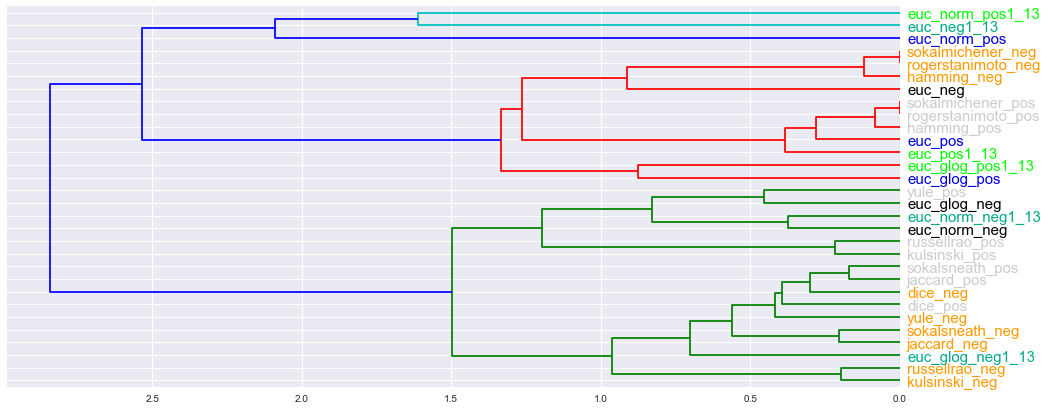

In [92]:
print('Hierarchical clustering of the Cophenetic Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('Euc - Original peak alignment that all binary measures use (2-1)')
print('Euc1_13 - Peak alignment requiring that a feature appears at least in 13 samples of all samples.')
Z_C = hier.linkage(df_C, metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_C, labels=df_C.columns,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

### Distance discrimination of all methods applied (and shown in previous heatmap/dendrogram).

In [93]:
#Preparing Z linkage matrices
Z = []
Z.extend(euclidean)
Z.extend(Z_neg)
Z.extend(Z_pos)

In [94]:
disc_average = np.zeros((1,30))
disc_median = np.zeros((1,30))
disc_correct = np.zeros((1,30))
for i in range(len(Z)):
    discrim = sca.dist_discrim(aligned_all_neg, Z[i], 3, method = 'average')  #all samples have the same order
    disc_average[0,i] = discrim[0]
    disc_median[0,i] = sca.dist_discrim(aligned_all_neg, Z[i], 3, 'median')[0] #all samples have the same order
    correct = np.array(list(discrim[1].values()))
    disc_correct[0,i] = len(correct[correct>0])

disc_average = pd.DataFrame(disc_average, index = ['distances average'], columns = colnames)
disc_median = pd.DataFrame(disc_median, index = ['distances median'], columns = colnames)
disc_correct = pd.DataFrame(disc_correct, index = ['correct groupings'], columns = colnames)

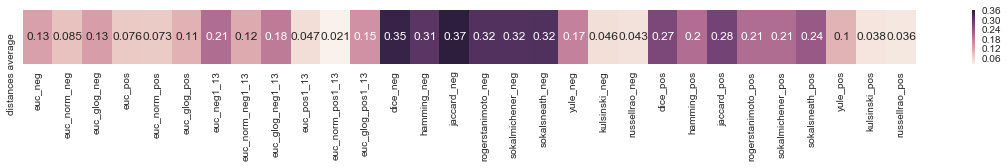

In [95]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_average, annot=True, ax=ax)

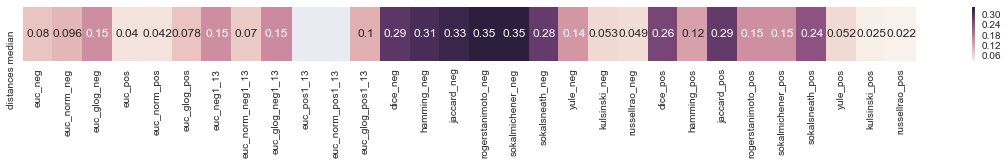

In [96]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_median, annot=True, ax=ax)

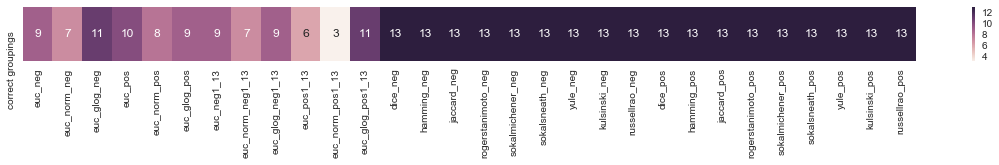

In [97]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_correct, annot=True, ax=ax)

### Results summary of dendrograms made with the heatmaps

- See original similarity_analysis. (The discussion of the other peak_alignments aren't written in-depth).

### Extra binary measures of peak alignment 2: 1-13

In [98]:
sim_pos = mz_similarity(aligned_all_pos2)
sim_neg = mz_similarity(aligned_all_neg2)

In [99]:
dfpos = pd.DataFrame(sim_pos.sample_similarity_jaccard,
                     columns=sim_pos.sample_names,
                     index=sim_pos.sample_names)

dfneg = pd.DataFrame(sim_neg.sample_similarity_jaccard,
                     columns=sim_neg.sample_names,
                     index=sim_neg.sample_names)

Sample similarity, positive mode, Peak Alignment: 1_13


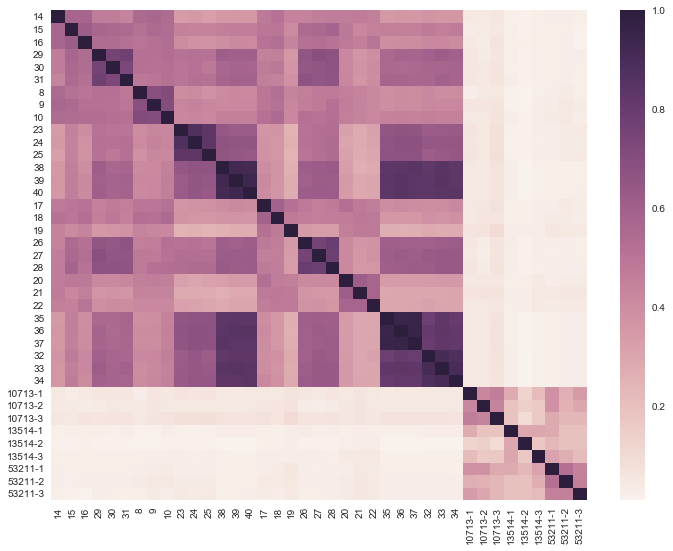

In [100]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, positive mode, Peak Alignment: 1_13')
hm = sns.heatmap(dfpos, annot=False, ax=ax)

Sample similarity, negative mode, Peak Alignment: 1_13


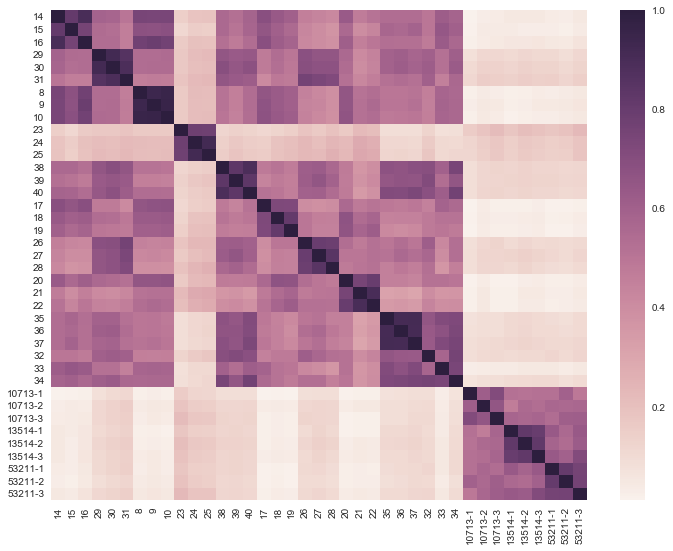

In [101]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, negative mode, Peak Alignment: 1_13')
hm = sns.heatmap(dfneg, annot=False, ax=ax)

Sample HC, NEGATIVE mode, Peak Alignment: 1-13


C:\Users\francisco\Anaconda3\lib\site-packages\seaborn\matrix.py:795: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  colors = colors.ix[data.columns]
C:\Users\francisco\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


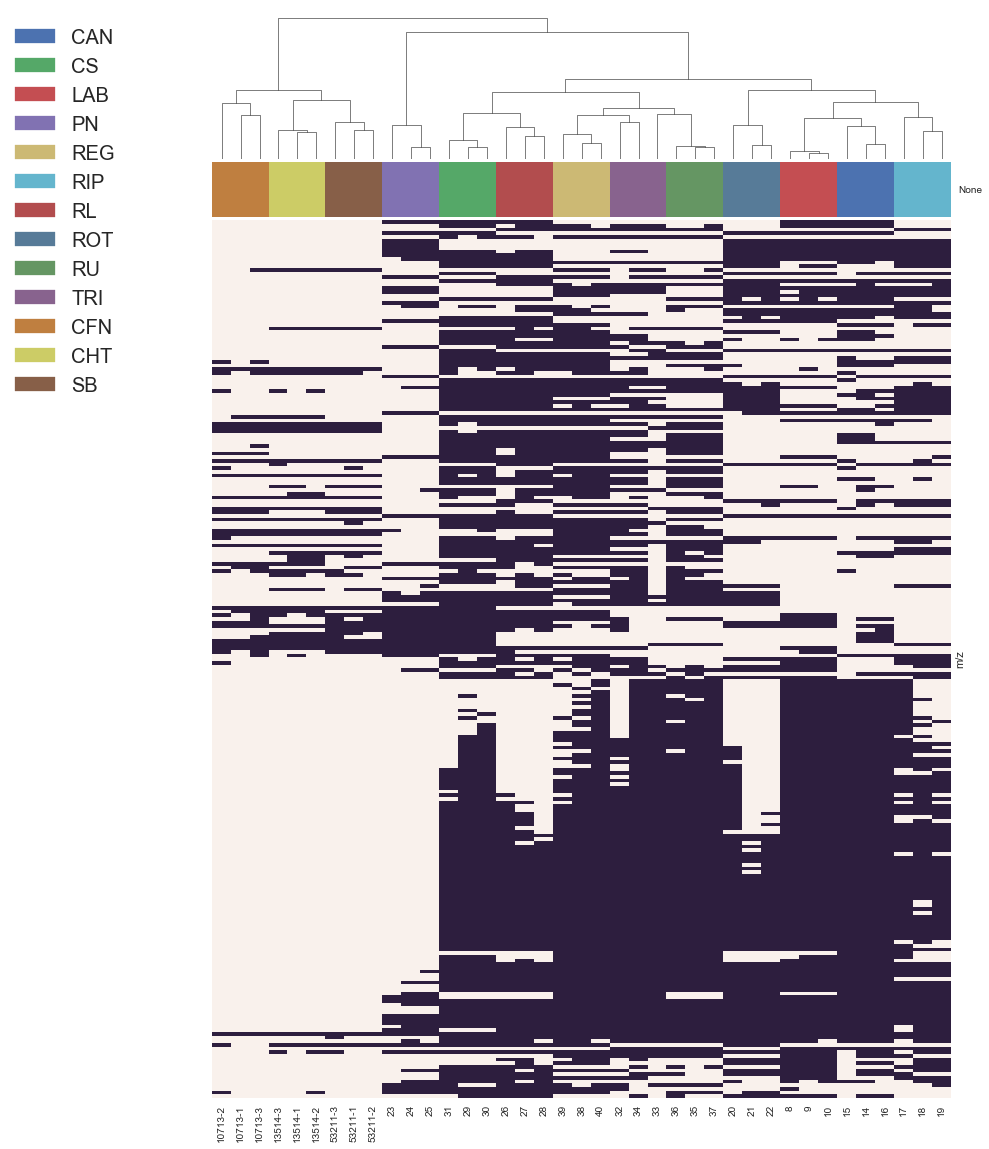

In [102]:
print('Sample HC, NEGATIVE mode, Peak Alignment: 1-13')
g = clustermap_peak_list(aligned_all_neg2)

Sample HC, POSITIVE mode, Peak Alignment: 1-13


C:\Users\francisco\Anaconda3\lib\site-packages\seaborn\matrix.py:795: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  colors = colors.ix[data.columns]
C:\Users\francisco\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


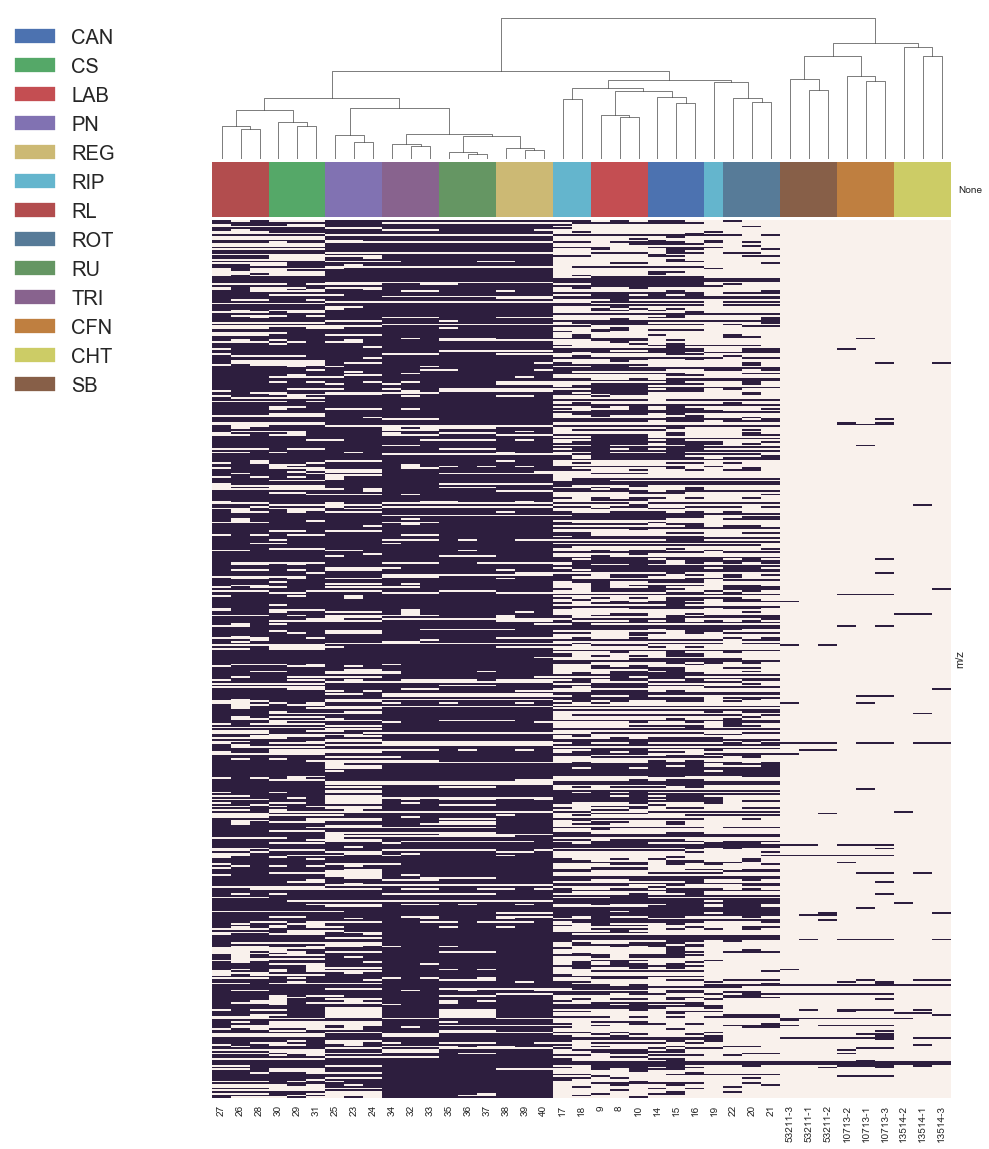

In [103]:
print('Sample HC, POSITIVE mode, Peak Alignment: 1-13')
g = clustermap_peak_list(aligned_all_pos2)